# Introduction to Regression  
*Supervised Learning with scikit-learn*

---

## 1. Introduction to Regression

- **Regression** is a type of supervised learning where the target variable is **continuous** (e.g., GDP, house price, blood glucose level).
- The goal: **Predict a numeric value** based on input features.

---

## 2. Predicting Blood Glucose Levels

We'll use a dataset containing women's health data to **predict blood glucose levels**.

### Loading the Data

```python
import pandas as pd
diabetes_df = pd.read_csv("diabetes.csv")
print(diabetes_df.head())
```

#### Output

```
   pregnancies  glucose  triceps  insulin   bmi  age  diabetes
0            6      148       35        0  33.6   50         1
1            1       85       29        0  26.6   31         0
2            8      183        0        0  23.3   32         1
3            1       89       23       94  28.1   21         0
4            0      137       35      168  43.1   33         1
```

### Explanation

- `import pandas as pd`: Imports the pandas library for data manipulation.
- `diabetes_df = pd.read_csv("diabetes.csv")`: Loads the CSV file into a DataFrame called `diabetes_df`.
- `print(diabetes_df.head())`: Shows the first five rows of the data.

#### Data Columns

- `pregnancies`: Number of pregnancies
- `glucose`: Blood glucose level (target variable)
- `triceps`: Triceps skinfold measurement
- `insulin`: Insulin level
- `bmi`: Body Mass Index
- `age`: Age in years
- `diabetes`: Diabetes status (1: diagnosed, 0: not diagnosed)

**Significance:**  
We will use these features to predict the `glucose` value.

---

## 3. Creating Feature and Target Arrays

We need to separate our features (`X`) and target (`y`) as required by scikit-learn.

```python
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))
```

#### Output

```
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
```

### Explanation

- `diabetes_df.drop("glucose", axis=1)`: Removes the `glucose` column from the DataFrame (leaving features).
- `.values`: Converts the DataFrame to a NumPy array.
- `X = ...`: Stores all features in `X`.
- `y = diabetes_df["glucose"].values`: Stores the target values (`glucose`) in `y`.
- `print(type(X), type(y))`: Confirms both are NumPy arrays.

**Significance:**  
`X` (features) and `y` (target) are now ready for scikit-learn models.

---

## 4. Making Predictions from a Single Feature

Let's try to predict blood glucose using **only the BMI feature**.

```python
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)
```

#### Output

```
(752,) (752,)
```

### Explanation

- `X[:, 3]`: Selects the 4th column (index 3) from all rows in `X`. This column is BMI.
- `X_bmi = X[:, 3]`: Stores BMI values in `X_bmi`.
- `print(y.shape, X_bmi.shape)`: Prints the shapes of `y` and `X_bmi`. Both are 1D arrays with 752 elements.

**Note:**  
scikit-learn expects features as **2D arrays** (`(n_samples, n_features)`).

#### Reshaping the BMI Feature

```python
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)
```

#### Output

```
(752, 1)
```

### Explanation

- `X_bmi.reshape(-1, 1)`: Converts the 1D array to a 2D array with one column and 752 rows.
    - `-1` lets NumPy compute the number of rows automatically.
- `print(X_bmi.shape)`: Confirms `X_bmi` is now a 2D array, suitable for modeling.

**Significance:**  
We have prepared `X_bmi` for use in scikit-learn, which requires 2D feature arrays.

---

## 5. Plotting Glucose vs. Body Mass Index

Let's visualize the relationship between BMI and blood glucose.

```python
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()
```

#### Output

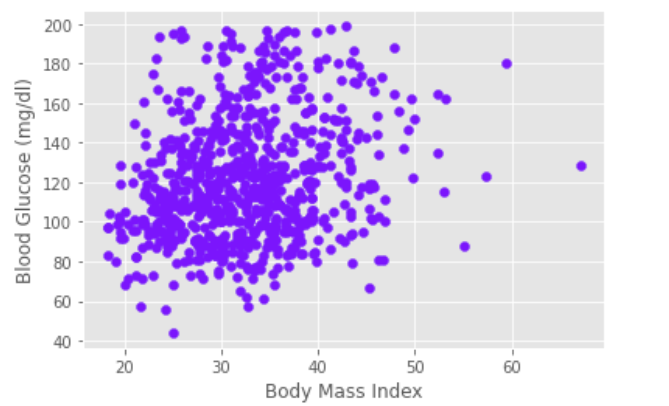

*A scatter plot appears, showing BMI (x-axis) vs. Blood Glucose (y-axis).*

### Explanation

- `import matplotlib.pyplot as plt`: Imports the plotting library.
- `plt.scatter(X_bmi, y)`: Creates a scatter plot of BMI vs. blood glucose.
- `plt.ylabel("Blood Glucose (mg/dl)")`: Labels the y-axis.
- `plt.xlabel("Body Mass Index")`: Labels the x-axis.
- `plt.show()`: Displays the plot.

**Interpretation:**  
The plot shows that as BMI increases, blood glucose levels also tend to increase—a positive relationship.

---

## 6. Interpreting the Scatter Plot

- **Observation:**  
  Generally, higher BMI is associated with higher blood glucose levels.
- **Significance:**  
  Suggests BMI is a useful predictor for blood glucose.

---

## 7. Fitting a Regression Model

Now, let's fit a **linear regression model** to this data.

```python
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()
```

#### Output

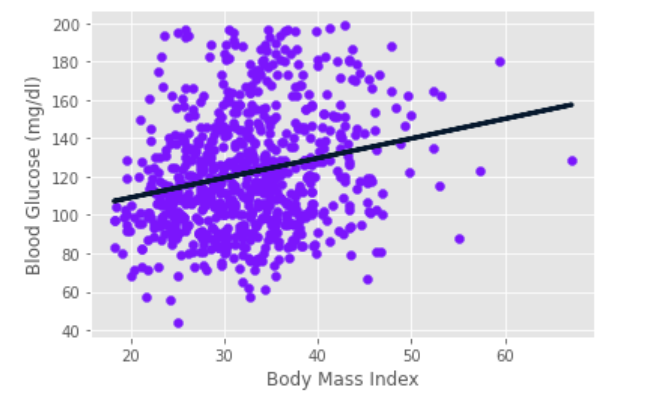

*A scatter plot with a line fitted through the data points (the regression line).*

### Explanation

- `from sklearn.linear_model import LinearRegression`: Imports the Linear Regression estimator.
- `reg = LinearRegression()`: Creates a Linear Regression object.
    - **Purpose:** This object will learn the best-fit line parameters.
- `reg.fit(X_bmi, y)`: Fits the model to the BMI and blood glucose data.
    - **Purpose:** Finds the best-fit line (minimizes squared error).
- `predictions = reg.predict(X_bmi)`: Predicts blood glucose values using the fitted model.
    - **Purpose:** Calculates the model’s predictions for each BMI value.
- `plt.scatter(X_bmi, y)`: Plots original data (BMI vs. glucose).
- `plt.plot(X_bmi, predictions)`: Plots the regression line (predicted glucose vs. BMI).
- `plt.ylabel(...)`, `plt.xlabel(...)`, `plt.show()`: Labels and displays the plot.

**Interpretation:**

- The **scatter plot** shows the data points.
- The **line** shows the predictions of the linear regression model (the "line of best fit").
- The **slope** of this line shows the relationship between BMI and blood glucose.
    - In this case, there is a weak-to-moderate positive correlation: as BMI rises, blood glucose tends to rise.

---

## 8. Interpreting the Regression Line

- The **black regression line** represents the model’s prediction of blood glucose based on BMI.
- **Correlation:**  
    - The relationship is weak-to-moderate positive.
    - Not all variance in blood glucose is explained by BMI alone.

---

# Summary

- **Regression** predicts continuous values.
- We used health data to predict blood glucose from BMI.
- Data preparation involved separating features and the target, and proper reshaping for scikit-learn.
- **Visualization** showed a positive relationship between BMI and glucose.
- **Linear regression** modeled this relationship, and the fitted line provides predictions.


### Exercise
Creating features
In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:
```
     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83
```
You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

Instructions

Create X, an array of the values from the sales_df DataFrame's "radio" column.
Create y, an array of the values from the sales_df DataFrame's "sales" column.
Reshape X into a two-dimensional NumPy array.
Print the shape of X and y.
```python
import numpy as np

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(y.shape, X.shape)

<script.py> output:
    (4546,) (4546, 1)
```

### Exercise
Building a linear regression model
Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

X and y have been preloaded for you as follows:
```
y = sales_df["sales"].values
X = sales_df["radio"].values.reshape(-1, 1)
```
Instructions

Import LinearRegression.
Instantiate a linear regression model.
Predict sales values using X, storing as predictions.
```python
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

<script.py> output:
    [ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
     111137.28167129]
```

### Exercise
Visualizing a linear regression model
Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.

Instructions

Import matplotlib.pyplot as plt.
Create a scatter plot visualizing y against X, with observations in blue.
Draw a red line plot displaying the predictions against X.
Display the plot.
```python
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()
```
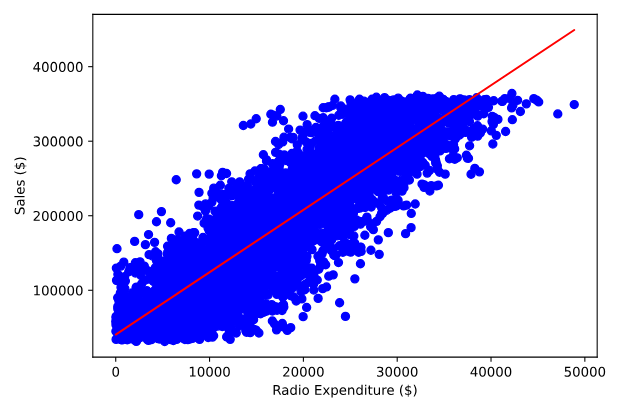

# The Basics of Linear Regression  
*Supervised Learning with scikit-learn*

---

## 1. How Does Linear Regression Work?

- **Linear regression** fits a straight line to data to model the relationship between input feature(s) and a continuous target variable.
    - In **simple linear regression**, you use one feature:  
      $y = ax + b$
        - $y$ = target (what you want to predict)
        - $x$ = single feature (input)
        - $a$ = slope (coefficient, tells you how much $y$ changes as $x$ changes)
        - $b$ = intercept (where the line crosses the y-axis)

---

## 2. Regression Mechanics

- The core idea: **Find the best-fitting line** by choosing optimal values for $a$ (slope) and $b$ (intercept).
- **How do we choose $a$ and $b$?**
    - Define an **error function** (also called a loss or cost function) that measures how well a particular line fits the data.
    - Choose the line (values of $a$ and $b$) that **minimizes the error function**.

---

## 3. The Loss Function

- **Goal:** Make the line as close to the data points as possible.

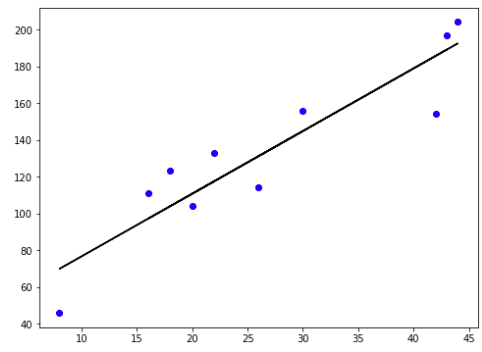

- For each observation, compute the **vertical distance** from the point to the line.
    - This distance is called a **residual**.
 
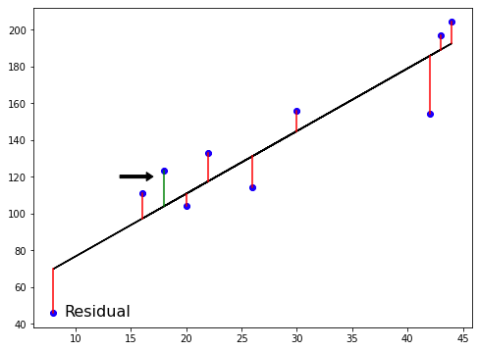

**Key Points:**
- Residual = $y_i - \hat{y}_i$ (actual value minus predicted value)
- If you sum all the residuals, positive and negative differences can cancel each other out.

---

## 4. Squared Residuals and RSS

- **To avoid cancellation**, square each residual before summing.  
    - *Residual Sum of Squares (RSS):*  
      $$
      RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2
      $$
    - **Ordinary Least Squares (OLS):**  
      The most common form of linear regression, which seeks to **minimize the RSS**.

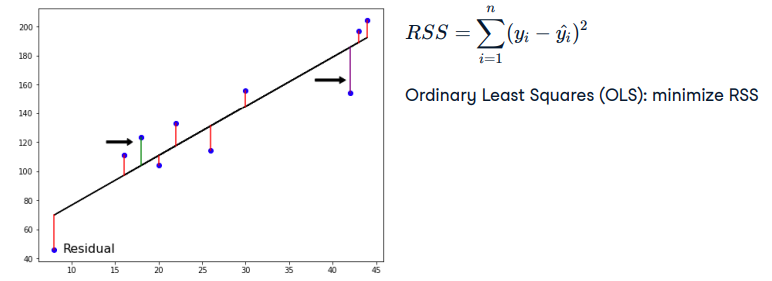

---

## 5. Linear Regression in Higher Dimensions

- With two features ($x_1$, $x_2$):  
  $y = a_1 x_1 + a_2 x_2 + b$
    - Need to determine 3 variables to fit a linear regression:
        - $a_1$, $a_2$ (coefficients for each feature)
        - $b$ (intercept)
- With $n$ features:  
  $y = a_1 x_1 + a_2 x_2 + \ldots + a_n x_n + b$
    - This is **multiple linear regression**.
- **scikit-learn:**  
    - Requires two arrays:
        - **Features** ($X$): shape (n_samples, n_features)
        - **Target** ($y$): shape (n_samples,)

---

## 6. Linear Regression Using All Features

Let's perform **multiple linear regression** to predict blood glucose levels using all features from the diabetes dataset.

### Code Example

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the linear regression model
reg_all = LinearRegression()

# Fit the model to the training data
reg_all.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_all.predict(X_test)
```

#### Output

_No direct output from these lines, but now:_
- `reg_all` contains the fitted model.
- `y_pred` contains predicted blood glucose levels for the test set.

### Line-by-Line Explanation

- `from sklearn.model_selection import train_test_split`:  
    - Imports the function to split data into training and test sets.
- `from sklearn.linear_model import LinearRegression`:  
    - Imports the linear regression model.
- `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)`:  
    - Splits the data:
        - 70% for training, 30% for testing
        - `random_state=42` ensures reproducibility
- `reg_all = LinearRegression()`:  
    - Creates a new linear regression model object.
- `reg_all.fit(X_train, y_train)`:  
    - Trains (fits) the model using the training data.
- `y_pred = reg_all.predict(X_test)`:  
    - Uses the trained model to predict blood glucose values on the test set.

**Significance:**  
- This is the standard workflow for regression in scikit-learn.
- The model automatically performs OLS (ordinary least squares) under the hood.

---

## 7. R-squared ($R^2$)

- **$R^2$** (coefficient of determination) quantifies how much of the variance in the target variable is explained by the features.
    - Ranges from 0 to 1:
        - **1**: Model explains all the variance (perfect fit)
        - **0**: Model explains none of the variance (no predictive power)

- **Example:**
    - An $R^2$ of 0.35 means 35% of the variance in blood glucose levels is explained by the model's features.

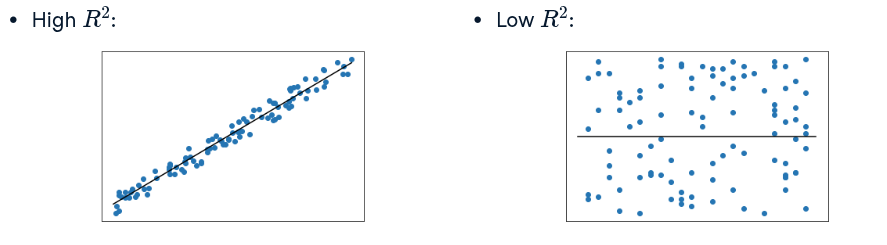

---

## 8. R-squared in scikit-learn

```python
r2 = reg_all.score(X_test, y_test)
print(r2)
```

#### Output

```
0.356302876407827
```

### Explanation

- `reg_all.score(X_test, y_test)`:
    - Computes the $R^2$ value for the model on the test data.
    - Here, the features explain about 36% of the variance in blood glucose levels.
- `print(r2)`:
    - Displays the $R^2$ value.

**Significance:**  
- $R^2$ gives a quick, interpretable measure of model quality.

---

## 9. Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

- **Mean Squared Error (MSE):**
    - The average of the squared differences between actual and predicted values.
    - Measured in units of the target variable squared.
    - Example: if target is in mg/dL, MSE is in $(mg/dL)^2$.

    $$
    MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
    $$

- **Root Mean Squared Error (RMSE):**
    - The square root of MSE.
    - Measured in the same units as the target variable.
    - Easier to interpret than MSE.

    $$
    RMSE = \sqrt{MSE}
    $$

---

## 10. RMSE in scikit-learn

```python
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)
```

#### Output

```
24.028109426907236
```

### Explanation

- `from sklearn.metrics import root_mean_squared_error`:  
    - Imports the function to compute RMSE.
- `rmse = root_mean_squared_error(y_test, y_pred)`:
    - Calculates the RMSE between actual and predicted values.
    - Here, the average prediction error is about **24 mg/dL**.
- `print(rmse)`:
    - Displays the RMSE value.

**Significance:**  
- Tells us, on average, how far the model's predictions are from the actual blood glucose values.
- Lower RMSE indicates a better fit.

---

# Summary

- **Linear regression** fits a line (or hyperplane) to predict a continuous target.
- **OLS** (ordinary least squares) minimizes the sum of squared residuals.
- **Multiple regression** handles more than one feature.
- **scikit-learn** makes regression modeling straightforward:
    - Split data
    - Fit model
    - Predict
    - Evaluate (using $R^2$ and RMSE)
- **$R^2$** tells you what percentage of variance in the target is explained by the model.
- **RMSE** gives an average error in the units of your target.



### Exercise
Fit and predict for regression
Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows:
```
     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83
```
You will then use this model to predict sales based on the values of the test features.

LinearRegression and train_test_split have been preloaded for you from their respective modules.

Instructions

Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
Instantiate a linear regression model.
Fit the model to the training data.
Create y_pred, making predictions for sales using the test features.
```python
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

<script.py> output:
    Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]

```

### Exercise
Regression performance
Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

Instructions

Import root_mean_squared_error.
Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
Calculate the model's root mean squared error using y_test and y_pred.
Print r_squared and rmse.
```python
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

<script.py> output:
    R^2: 0.9990165886162027
    RMSE: 2942.372219812037
```


# Cross-Validation  
*Supervised Learning with scikit-learn*

---

## 1. Why Do We Need Cross-Validation?

- **Problem:**  
  When we split our data into training and test sets and compute metrics (like $R^2$) on the test set, the result depends on how the data was split.  
    - Some splits may have unusual data in the test set, making our model look better or worse than it really is.
    - This means *test set performance may not reflect true generalization to unseen data*.

- **Solution:**  
  **Cross-validation**!  
  It gives a more reliable estimate of model performance by using *multiple splits*.

---

## 2. Cross-Validation Basics

- **How does cross-validation work?**
    1. **Split the data into $k$ groups (folds)** (e.g., 5 folds).
    2. For each fold:
        - Use the fold as a *test set*.
        - Use the remaining folds as the *training set*.
        - Fit the model on the training set, predict on the test set.
        - Compute a performance metric (e.g., $R^2$).

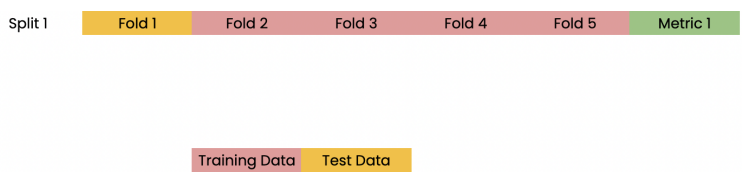

    
3. Repeat this process $k$ times, each time with a different fold as the test set.
4. Collect all $k$ scores (e.g., $R^2$ values), and compute statistics (mean, std, confidence interval).

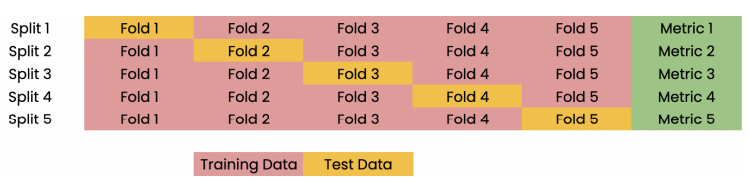

---

## 3. Visualizing the Process

- **Example (5-fold CV):**
    - Fold 1: test, Folds 2-5: train → score 1
    - Fold 2: test, Folds 1,3-5: train → score 2
    - Fold 3: test, Folds 1,2,4,5: train → score 3
    - Fold 4: test, Folds 1-3,5: train → score 4
    - Fold 5: test, Folds 1-4: train → score 5

- **Result:**  
  5 performance scores for the model.

---

## 4. How Many Folds?

- **Terminology:**
    - 5 folds = 5-fold CV
    - 10 folds = 10-fold CV
    - $k$ folds = $k$-fold CV

- **Trade-off:**
    - More folds = More reliable, but **more computationally expensive** (because the model is trained $k$ times).

---

## 5. Cross-Validation in scikit-learn

Let's look at how to do cross-validation with scikit-learn.

### Code Example

```python
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Set up KFold cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Run cross-validation
cv_results = cross_val_score(reg, X, y, cv=kf)
```

### Output

```
array([0.70262578, 0.7659624 , 0.75188205, 0.76914482, 0.72551151, 0.73608277])
```

### Line-by-Line Explanation

- `from sklearn.model_selection import cross_val_score, KFold`:  
    - Imports tools for cross-validation.
    - `cross_val_score`: Automates the CV process.
    - `KFold`: Lets you specify the number of folds, shuffling, and randomness.

- `from sklearn.linear_model import LinearRegression`:  
    - Imports the linear regression model.

- `kf = KFold(n_splits=6, shuffle=True, random_state=42)`:
    - Creates a *KFold* object for 6-fold cross-validation.
    - `shuffle=True`: Shuffles data before splitting into folds (important for randomization).
    - `random_state=42`: Ensures the shuffling is repeatable (for reproducibility).

- `reg = LinearRegression()`:
    - Instantiates a linear regression model.

- `cv_results = cross_val_score(reg, X, y, cv=kf)`:
    - Runs cross-validation:
        - Trains and tests the model 6 times (once for each fold).
        - For each fold, trains on 5/6 of the data, tests on 1/6.
        - Returns an array of 6 $R^2$ scores (default for regression in scikit-learn).

**Significance:**  
- You get a *distribution* of model scores, not just a single value—better estimate of generalization.

---

## 6. Evaluating Cross-Validation Performance

You can compute additional statistics to summarize your cross-validation results.

### Code Example

```python
import numpy as np

print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))
```

### Output

```
[0.70262578 0.7659624  0.75188205 0.76914482 0.72551151 0.73608277]
0.7418682216666667 0.023330243960652888
[0.7054865  0.76874702]
```

### Line-by-Line Explanation

- `import numpy as np`:
    - Imports NumPy for numerical operations.

- `print(cv_results)`:
    - Prints all $R^2$ scores from the 6 cross-validation folds.
    - **Interpretation**: Shows the model's performance across different splits.

- `print(np.mean(cv_results), np.std(cv_results))`:
    - Calculates the **mean** and **standard deviation** of the cross-validation scores.
    - **Mean**: Best estimate of "average" model performance.
    - **Std**: How much the performance varies across splits.
    - **Here:**  
        - Mean $R^2$: **0.74**
        - Std: **0.023** (low std means stable model performance).

- `print(np.quantile(cv_results, [0.025, 0.975]))`:
    - Computes the **2.5th** and **97.5th** percentiles (approximate 95% confidence interval).
    - **Here:**  
        - 95% of scores fall between **0.71** and **0.77**.

**Significance:**  
- These summary statistics give you a much better sense of how your model might perform on new, unseen data.

---

# Summary

- **Cross-validation** is a reliable way to estimate model performance, helping avoid over-reliance on a single random train-test split.
- **$k$-fold CV** splits data into $k$ parts, training and testing $k$ times so each part is used as a test set once.
- **scikit-learn** makes cross-validation easy with `KFold` and `cross_val_score`.
- **Reporting statistics** (mean, std, confidence intervals) on CV scores gives a complete picture of model reliability and generalization.

*Robust model evaluation is just as important as model building!*

### Exercise
Cross-validation for R-squared
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.

Instructions

Import KFold and cross_val_score.
Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
Perform cross-validation using reg on X and y, passing kf to cv.
Print the cv_scores.
```python
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

<script.py> output:
    [0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]

```

### Exercise
Analyzing cross-validation metrics
Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise.

numpy has been imported for you as np.

Instructions

Calculate and print the mean of the results.
Calculate and print the standard deviation of cv_results.
Display the 95% confidence interval for your results using np.quantile().
```python
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

<script.py> output:
    0.7536937416666666
    0.012305386274436092
    [0.74141863 0.77191915]

```

# Regularized Regression: Detailed Notes

---

## 1. Introduction: What is Regularization?

- **Regularization** is a technique used in regression to avoid overfitting.
- In **linear regression**, the model chooses a coefficient (`a`) for each feature variable, and an intercept (`b`), by minimizing a loss function (usually the sum of squared errors).
- **Problem:** If coefficients are allowed to be very large (positive or negative), the model can fit the training data too closely—**overfitting**—and perform poorly on new data.
- **Solution:** Modify (regularize) the loss function to **penalize large coefficients**, discouraging complexity and helping the model generalize.

---

## 2. Why Regularize?

- **Large coefficients ⇒ Overfitting.**
- **Regularization**: Add a penalty to the loss function for large weights.
- **Purpose**: To control model complexity and improve generalization to new data.

---

## 3. Ridge Regression

### What is Ridge Regression?

- **Ridge regression** modifies the ordinary least squares (OLS) loss function by **adding the sum of the squared coefficients, multiplied by a parameter α**.

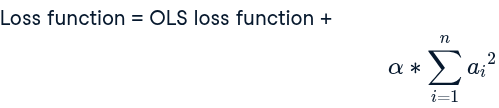

  ```
  Ridge Loss = OLS Loss + α * sum of squared coefficients
  ```

- **Penalizes**: Both large positive and negative coefficients.
- **Parameter α (alpha)**:
    - Controls strength of the penalty.
    - **α = 0**: Just OLS (no regularization); at risk of overfitting.
    - **Large α**: Strong penalty; can lead to **underfitting**.
    - **α is a hyperparameter**: It's not learned from data, but chosen/tuned by the user (like `k` in KNN).
    - **Goal**: Find the α that gives the best model performance.

---

## 4. Ridge Regression in scikit-learn

### Example Code

```python
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)
```

#### **Sample Output**

```
[0.2828466623222221, 0.28320633574804777, 0.2853000732200006, 0.26423984812668133, 0.19292424694100963]
```

---

### **Line-by-Line Explanation**

1. **Import the Ridge regression class**
    ```python
    from sklearn.linear_model import Ridge
    ```
    - **What:** Brings in the Ridge regression model from scikit-learn.
    - **Why:** To use it for regularized linear regression.

2. **Initialize a list to store performance scores**
    ```python
    scores = []
    ```
    - **What:** Empty list to hold the R² scores for each model.
    - **Why:** To compare performance across α values.

3. **Loop over different values of alpha**
    ```python
    for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ```
    - **What:** Iterates over a list of α (regularization strength) values.
    - **Why:** To see the effect of different regularization strengths.

4. **Instantiate Ridge with the current alpha**
    ```python
    ridge = Ridge(alpha=alpha)
    ```
    - **What:** Creates a Ridge regression model with the given α.
    - **Why:** So each iteration uses a different regularization strength.

5. **Fit the model to the training data**
    ```python
    ridge.fit(X_train, y_train)
    ```
    - **What:** Trains the Ridge model on the training set.
    - **Why:** To learn coefficients for each α.

6. **Predict on the test data**
    ```python
    y_pred = ridge.predict(X_test)
    ```
    - **What:** Uses the trained model to predict targets for test data.
    - **Why:** To evaluate model performance.

7. **Calculate R² score and store it**
    ```python
    scores.append(ridge.score(X_test, y_test))
    ```
    - **What:** Computes the R² (coefficient of determination) on the test set and appends to `scores`.
    - **Why:** R² measures how well predictions match the actual data (1.0 = perfect prediction).

8. **Print all scores**
    ```python
    print(scores)
    ```
    - **What:** Shows the R² scores for each α.

---

### **Output Explanation**

- The output list shows R² scores for each α value.
    - **As α increases**, the R² score generally **decreases**.
    - **Interpretation:** Too much regularization (large α) hurts performance (**underfitting**), while too little can allow overfitting.
    - **Goal:** Find a balance—an α that gives the best test performance.

---

## 5. Lasso Regression

### What is Lasso Regression?

- **Lasso regression** is similar to ridge, but instead of penalizing the sum of squared coefficients, it penalizes the **sum of the absolute values** of the coefficients.

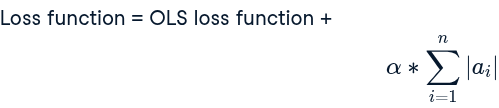
  
  ```
  Lasso Loss = OLS Loss + α * sum of absolute values of coefficients
  ```

- **Key difference:** Lasso can shrink some coefficients **exactly to zero**, effectively **selecting features**.

---

## 6. Lasso Regression in scikit-learn

### Example Code

```python
from sklearn.linear_model import Lasso

scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)
```

#### **Sample Output**

```
[0.99991649071123, 0.99961700284223, 0.93882227671069, 0.74855318676232, -0.05741034640016]
```

---

### **Line-by-Line Explanation**

1. **Import Lasso regression class**
    ```python
    from sklearn.linear_model import Lasso
    ```
    - **What:** Brings in Lasso regression from scikit-learn.
    - **Why:** To use for regularized regression that can select features.

2. **Initialize scores list**
    ```python
    scores = []
    ```
    - **What & Why:** Same as with Ridge.

3. **Loop over alpha values**
    ```python
    for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    ```
    - **What & Why:** Try different strengths of regularization.

4. **Instantiate Lasso model**
    ```python
    lasso = Lasso(alpha=alpha)
    ```
    - **What & Why:** Create new model for each α.

5. **Fit the model**
    ```python
    lasso.fit(X_train, y_train)
    ```
    - **What & Why:** Train on training data.

6. **Predict on test set**
    ```python
    lasso_pred = lasso.predict(X_test)
    ```
    - **What & Why:** Make predictions.

7. **Evaluate R² score**
    ```python
    scores.append(lasso.score(X_test, y_test))
    ```
    - **What & Why:** Assess and record performance.

8. **Print all scores**
    ```python
    print(scores)
    ```
    - **What & Why:** Compare performance across alphas.

---

### **Output Explanation**

- **R² scores** are very high for low α, then drop dramatically as α increases.
    - **Performance collapses** for large α (e.g., 50.0, negative R²).
    - **Lesson:** Too much regularization can destroy predictive power.
    - **Lasso is sensitive to α:** Must be tuned carefully.

---

## 7. Lasso Regression for Feature Selection

- **Unique power of Lasso**: Can shrink some coefficients to zero, thus **removing** unimportant features.
- **Interpreting feature importance**: Features with non-zero coefficients after fitting Lasso are selected as important.

---

## 8. Lasso for Feature Selection in scikit-learn

### Example Code

```python
from sklearn.linear_model import Lasso

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()
```

#### **Expected Output**

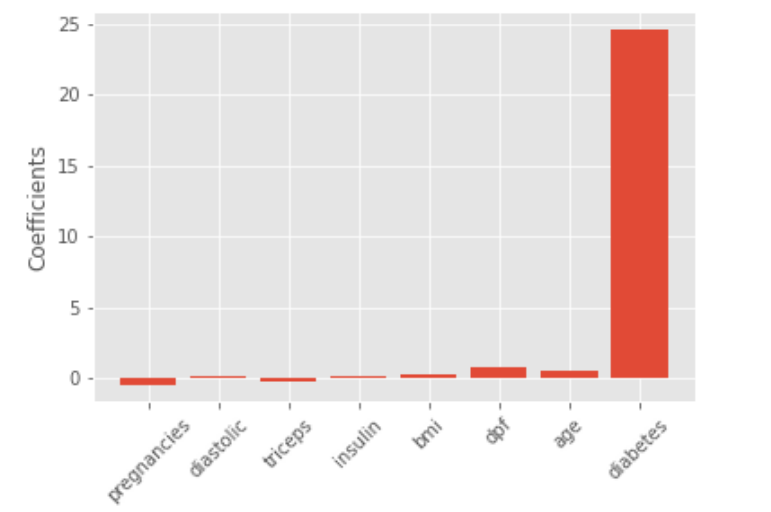

- A **bar plot** showing the coefficients for each feature.
- Features with **zero height** are considered **unimportant**.
- The **largest bar** is for the binary variable indicating diabetes status.

---

### **Line-by-Line Explanation**

1. **Import Lasso**
    ```python
    from sklearn.linear_model import Lasso
    ```
    - **What:** Import Lasso model.
    - **Why:** For feature selection.

2. **Prepare feature matrix and target vector**
    ```python
    X = diabetes_df.drop("glucose", axis=1).values
    y = diabetes_df["glucose"].values
    ```
    - **What:** 
        - `X`: All features except `"glucose"`.
        - `y`: The `"glucose"` column (target).
    - **Why:** Prepare data for regression.

3. **Get feature names**
    ```python
    names = diabetes_df.drop("glucose", axis=1).columns
    ```
    - **What:** Store names for plotting.
    - **Why:** So we can label the bars on the plot.

4. **Instantiate Lasso with α=0.1**
    ```python
    lasso = Lasso(alpha=0.1)
    ```
    - **What:** Create Lasso model with mild regularization.
    - **Why:** To see meaningful feature selection (not too strong, not too weak).

5. **Fit model and get coefficients**
    ```python
    lasso_coef = lasso.fit(X, y).coef_
    ```
    - **What:** Fit model to all data, extract learned coefficients.
    - **Why:** Coefficients show feature importance (non-zero = selected).

6. **Plot the coefficients**
    ```python
    plt.bar(names, lasso_coef)
    plt.xticks(rotation=45)
    plt.show()
    ```
    - **What:** Create bar plot with feature names and their coefficients.
    - **Why:** Visually identify important features.

---

### **Output Significance**

- **Visualization** helps communicate which features are important to non-technical audiences.
- If a feature's **coefficient is zero**, Lasso has determined it is **not important** for predicting `"glucose"`.
- In the diabetes dataset, the most important predictor is whether someone has diabetes or not—a good "sanity check" for the model and data.

---

## 9. Summary & Practice

- **Regularization** (Ridge & Lasso) is a powerful tool to combat overfitting.
- **Hyperparameters** like α must be tuned for best performance.
- **Lasso** can perform **feature selection** by shrinking irrelevant coefficients to zero.
- **Interpreting coefficients** (especially Lasso) is useful for understanding which features matter most.

---

# Key Takeaways

- **Ridge regression**: Penalizes sum of squared coefficients. Good for reducing model complexity but keeps all features.
- **Lasso regression**: Penalizes sum of absolute values of coefficients. Can set some coefficients to zero, performing feature selection.
- **Hyperparameter α**: Controls the strength of regularization. Must be chosen carefully (via cross-validation, etc.).
- **Interpreting models**: Use Lasso's feature selection to communicate which variables are most important.

---



### Exercise
Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their 
 scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.

Instructions

Import Ridge.
Instantiate Ridge, setting alpha equal to alpha.
Fit the model to the training data.
Calculate the 
 score for each iteration of ridge.
```python
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

<script.py> output:
    [0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.999015210475987, 0.9990152104764387, 0.9990152104809561]
```


### Exercise
Lasso regression for feature importance
In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as X and y, along with sales_columns, which contains the dataset's feature names.

Instructions

Import Lasso from sklearn.linear_model.
Instantiate a Lasso regressor with an alpha of 0.3.
Fit the model to the data.
Compute the model's coefficients, storing as lasso_coef.
```python
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

<script.py> output:
    [ 3.56256962 -0.00397035  0.00496385]

```
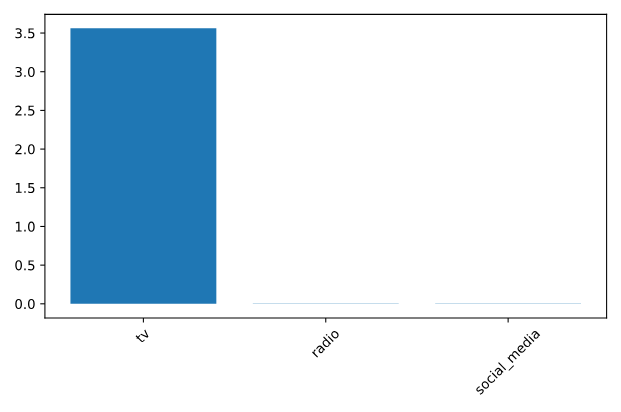

In [ ]:
# END CHAP #02